# Fraud Detection





**Introduction**

This project focuses on building a machine learning model to detect fraudulent financial transactions. Fraudulent activities can cause huge losses for companies, so the goal is to identify suspicious transactions in real time before they cause harm.

The dataset used contains over 6.3 million transactions with details like transaction amount, type, and account balances. We cleaned the data, handled class imbalance (very few fraud cases compared to normal ones), and trained a RandomForest model to recognize fraud patterns.

The model was evaluated using metrics like recall, precision, confusion matrix, and AUC score to ensure it performs well in real-world scenarios. Finally, we used the insights to recommend preventive actions the company can take to reduce fraud and protect customers.

## 1. Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



## 2. Load Dataset

In [2]:
# Load the data set
data = pd.read_csv("/Fraud.csv")


In [3]:
# View first 5 rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# View last 5 rows
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# Total rows and columns
data.shape

(6362620, 11)

In [6]:
# Check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 3. Basic Checks

In [7]:
# Check total number of missing values of each column
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Sum of missing values
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


There are no null values present in the dataset

## 5. Basic Visualization

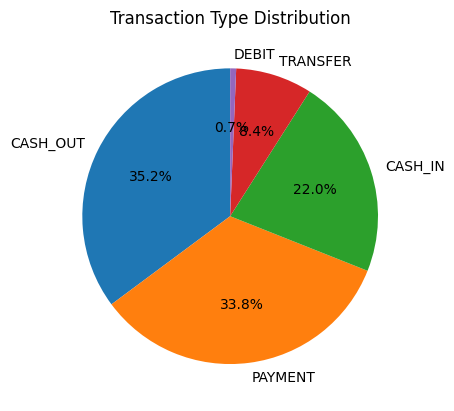

In [9]:
#Pie chat to show the different types of transaction and their distribution

type_counts = data['type'].value_counts()

plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Type Distribution')
plt.show()

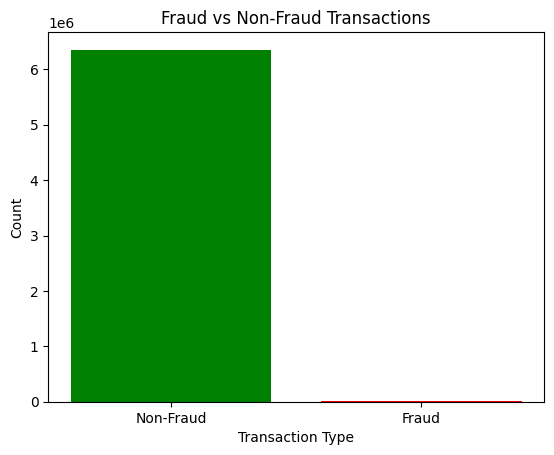

Fraud: 8213
Non-Fraud: 6354407


In [10]:
# Bar chart to show the distribution between Fraud and Non-fraud transactions

fraud_counts = data['isFraud'].value_counts()

plt.bar(fraud_counts.index, fraud_counts.values, color=['green','red'])
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

print("Fraud:", fraud_counts[1])
print("Non-Fraud:", fraud_counts[0])


The number of fraud transactions is much smaller compared to non-fraud transactions. This is why the red bar (representing fraud) is barely visible in the chart.

However, the count function confirms there are a total of 8,213 fraud transactions.


## 6. Handle Imbalance (Under-sampling)

We balanced the data because fraud cases were super rare compared to normal ones.

By sampling, we gave the model more fraud examples to learn from, which helps it actually spot fraud instead of ignoring it.

In [12]:
fraud = data[data['isFraud'] == 1]
non_fraud = data[data['isFraud'] == 0].sample(len(fraud)*5, random_state=42)

data_balanced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)
print("Balanced class distribution:\n", data_balanced['isFraud'].value_counts(normalize=True))

Balanced class distribution:
 isFraud
0    0.833333
1    0.166667
Name: proportion, dtype: float64


After balancing, about 83% of the data is non-fraud and 17% is fraud. This gives the model enough fraud examples to learn from.

## 7. Prepare Features and Target

We dropped "isFraud" because it’s the target we want to predict, and "isFlaggedFraud", "nameOrig", "nameDest" since they don’t help the model. Then, we converted the type column into dummy variables so the model can work with it better.

In [13]:
X = data_balanced.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = data_balanced['isFraud']
X = pd.get_dummies(X, columns=['type'], drop_first=True)

## 8. Train/Test Split

We split the data into training and test sets, keeping 20% for testing. Stratify was used to keep the same fraud ratio in both sets and set a random seed for consistent results.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

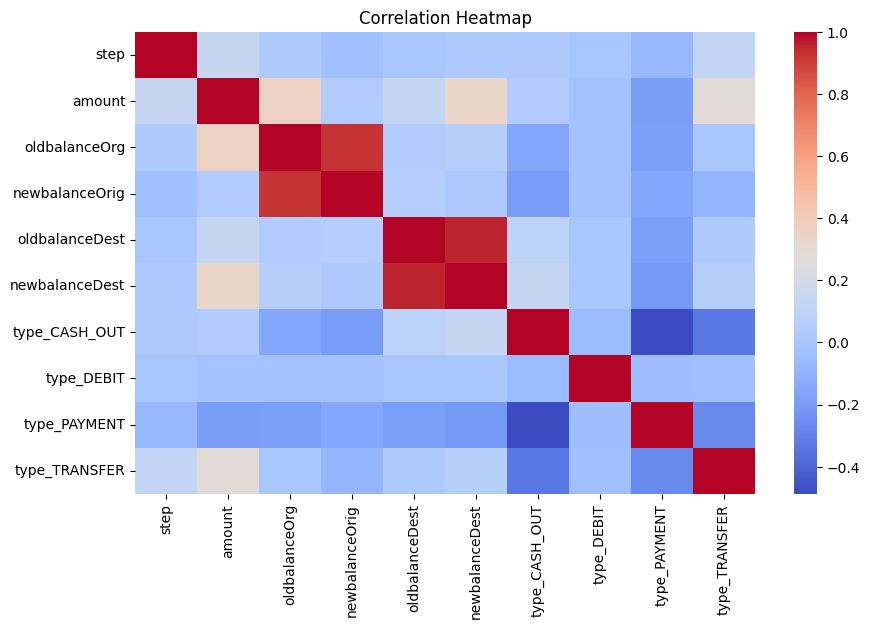

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows how our features relate to each other. Some are strongly connected, like "oldbalanceOrg" with "newbalanceOrig", and "oldbalanceDest" with "newbalanceDest". These could cause issues if they are too similar, but most features don’t have strong connections.

## 9. Train RandomForest Model

We created a Random Forest model with 100 trees and trained it on the training data.

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 10. Evaluate on Balanced Test Data

We used the model to predict fraud on the test data and got the probabilities too. Then, we checked how well it did with a confusion matrix, detailed report, and AUC score.

In [17]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[8174   39]
 [  21 1622]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9974    0.9953    0.9963      8213
           1     0.9765    0.9872    0.9818      1643

    accuracy                         0.9939      9856
   macro avg     0.9870    0.9912    0.9891      9856
weighted avg     0.9940    0.9939    0.9939      9856

AUC: 0.9996493986679521


 It correctly identified most fraud and non-fraud cases, with super high precision and recall. The accuracy is about 99.4%, and the AUC score close to 1 means it’s great at distinguishing fraud from normal transactions. The model did really well.

## 11. Evaluating the original Dataset

We prepared the full original data the same way as before, making sure columns match the training set.

Now, we are ready to test the model on the original dataset by predicting fraud and checking its performance with the confusion matrix, classification report, and AUC score.

In [18]:
X_full = data.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
X_full = pd.get_dummies(X_full, columns=['type'], drop_first=True)
X_full = X_full.reindex(columns=X_train.columns, fill_value=0)
y_full = data['isFraud']

y_proba_full = model.predict_proba(X_full)[:, 1]
y_pred_full = (y_proba_full > 0.5).astype(int)

print("Confusion Matrix (Original Data):\n", confusion_matrix(y_full, y_pred_full))
print("Classification Report (Original Data):\n", classification_report(y_full, y_pred_full, digits=4))
print("AUC (Original Data):", roc_auc_score(y_full, y_proba_full))

Confusion Matrix (Original Data):
 [[6328186   26221]
 [     21    8192]]
Classification Report (Original Data):
               precision    recall  f1-score   support

           0     1.0000    0.9959    0.9979   6354407
           1     0.2380    0.9974    0.3844      8213

    accuracy                         0.9959   6362620
   macro avg     0.6190    0.9967    0.6911   6362620
weighted avg     0.9990    0.9959    0.9971   6362620

AUC (Original Data): 0.999902782486338


When tested on the original data, the model still did great overall with about 99.6% accuracy and a super high AUC. It catches almost all fraud cases, but precision is low because fraud is very rare, so some non-fraud cases can get flagged too. Overall, it is still really good at spotting fraud.

## 12. Feature Importance

This code gets the feature importance from the model, sorts them, and plots a bar chart of the top 10 features that have the biggest impact on predicting fraud.

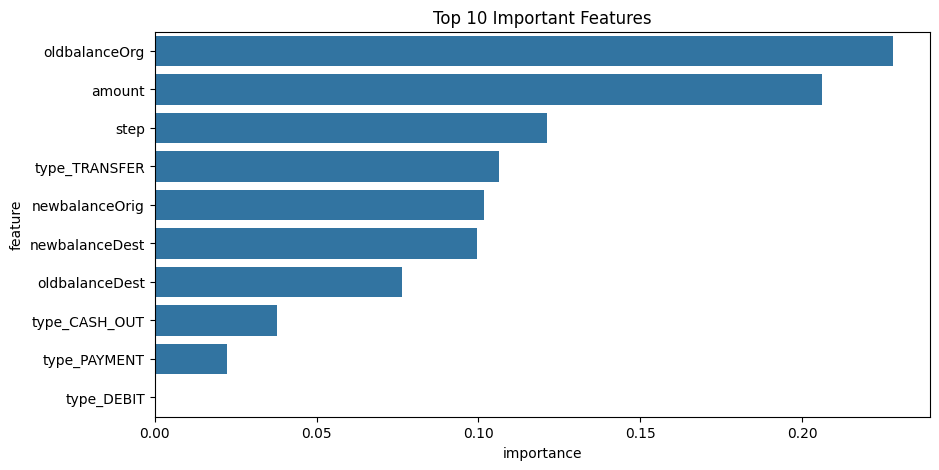

In [19]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
fi = fi.sort_values('importance', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=fi.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features')
plt.show()

This bar chart shows the top 10 most important features for our model. The most important ones are ‘oldbalanceOrg’ and ‘amount’, both with importance scores above 0.20, making them way more influential than the rest. Other important features include ‘step’, ‘type_TRANSFER’, ‘newbalanceOrig’, and ‘newbalanceDest’. Features like ‘type_DEBIT’, ‘type_PAYMENT’, and ‘type_CASH_OUT’ are less important and have much lower scores.

## 13. Summary & Recommendations


**Summary**

Overall, the Random Forest model did a great job detecting fraud. After balancing the dataset, the model reached about 99.4% accuracy and an AUC of 0.9996, which means it’s almost perfect at separating fraud from non-fraud. When tested on the original (imbalanced) data, it still performed really well, catching almost all fraud cases even though precision dropped a bit because fraud cases are so rare.

The most important factors driving fraud detection were:

-Transaction amount

-Transaction type (e.g., CASH_OUT, TRANSFER)

-Old and new balances of the accounts

These factors make sense because large/unusual amounts, specific transfer methods, and odd balance changes are all red flags for fraud.

**Recommendations**

-Add extra verification for high-value transfers and certain transaction types.

-Flag suspicious balance changes for manual review.

-Set up real-time alerts for transactions that look out of the ordinary.

-Retrain and monitor the model regularly with new data so it doesn’t get outdated.

-Track metrics (recall, precision, AUC) and the number of actual fraud cases over time to make sure the prevention measures are working.